In [1]:
import albumentations as A
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [ ]:
cv2.imread("download/")

In [3]:


def get_new_xml(root, image, bboxes, img_name):
    h, w, _ = image.shape
    root.find("filename").text = img_name
    root.find("size").find("width").text = str(w)
    root.find("size").find("height").text = str(h)
    for obj in root.findall("object"):
        root.remove(obj)    
    
    for box in bboxes:
        x1, y1, x2, y2, cls_ = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        obj = ET.SubElement(root, "object")
        name  = ET.SubElement(obj, "name")
        bndbox = ET.SubElement(obj, "bndbox")
        xmin = ET.SubElement(bndbox, "xmin")
        ymin = ET.SubElement(bndbox, "ymin")
        xmax = ET.SubElement(bndbox, "xmax")
        ymax = ET.SubElement(bndbox, "ymax")
        name.text = cls_
        xmin.text = str(x1)
        ymin.text = str(y1)
        xmax.text = str(x2)
        ymax.text = str(y2)
    
    return ET.ElementTree(root)

In [7]:
p=0.5
transform = A.Compose([
    A.ISONoise(p=p),#传感器噪声
    A.MotionBlur(p=p),
    A.RandomSizedBBoxSafeCrop(720,1280),
    A.RandomBrightnessContrast(p=p),
     A.Affine(p=p)
], bbox_params=A.BboxParams(format='pascal_voc', min_area=1024, min_visibility=0.1))

In [15]:
transformed = transform(image=image, bboxes=bboxes)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [16]:
transformed_bboxes

[(628.8121530508006, 0.0, 1280.0, 343.58284986915925, 'green_go')]

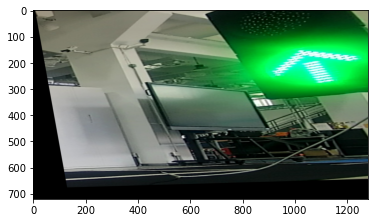

In [17]:
plt.imshow(transformed_image)

In [254]:
bboxes

[[437, 412, 492, 479, 'speed_limited'], [1082, 145, 1214, 381, 'green_go']]

In [18]:
new_root = get_new_xml(root, transformed_image, transformed_bboxes,"5056a.jpg")

In [159]:
new_root.write("exp.xml", encoding="utf-8", xml_declaration=True)

In [74]:
img = draw(transformed_image, transformed_bboxes)

In [73]:
def draw(image, bboxes):
    for box in bboxes:
        xmin, ymin, xmax, ymax, _ = box
        image = cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0,255,0),2)
    return image

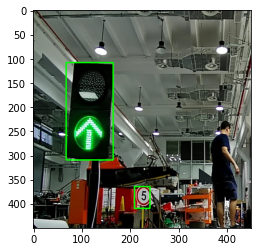

In [75]:
plt.imshow(img)

In [2]:
 0.01/256 > 1.140e-03

False

In [ ]:
1.137e-03